In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("NetflixOriginals.csv",encoding = "ISO-8859-1")
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [ ]:
#The number of rows and columns 
data.shape

(584, 6)

In [ ]:
#Check the DataFrame for missing values
data.isna().any()

Title         False
Genre         False
Premiere      False
Runtime       False
IMDB Score    False
Language      False
dtype: bool

In [ ]:
# Check for duplicate data
duplicate = data.duplicated()
print(duplicate.sum())

0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


**1-In which language were the long-running films created according to the data set? Make a visualization**


In [ ]:
data.sort_values(by = "Runtime", ascending=False).head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
247,Citation,Drama,"November 6, 2020",151,6.2,English
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese


In [ ]:
#split dataframe based on runtime
runtime_long = data[data["Runtime"] > 120]

runtime_long
runtime_long.shape

(68, 6)

In [ ]:
#count long-running movies by language which they are shot
runtime_long_language = runtime_long["Language"].value_counts()
runtime_long_language

English                 46
Hindi                    8
Korean                   3
Japanese                 2
Marathi                  2
Spanish                  2
Indonesian               1
Khmer/English/French     1
Portuguese               1
English/Korean           1
English/Akan             1
Name: Language, dtype: int64

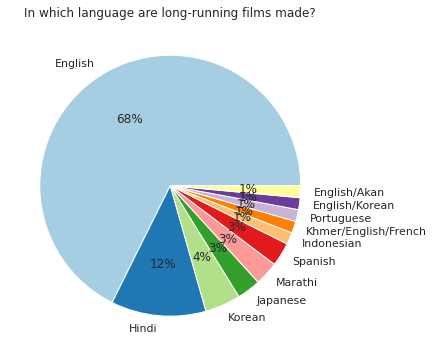

In [ ]:
#visualization of the count data
fig = plt.figure(figsize = (11, 6))
colors = sns.color_palette("Paired")
plt.pie(runtime_long_language, labels = runtime_long_language.index, colors = colors, autopct="%.0f%%")
plt.title("In which language are long-running films made?")
plt.show()


**2-Find and visualize the IMDB values of the movies shot in the "Documentary" genre between January 2019 and June 2020.**

In [ ]:
#Change Dtype of the Date Column
data["Premiere"]= pd.to_datetime(data["Premiere"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.5+ KB


In [ ]:
#split dataframe based on Genre = Documentary
doc = data[data["Genre"] == "Documentary"]
doc.shape

(159, 6)

In [ ]:
#split the dataframe base on a date range
start_date = "2019-01-01"
end_date = "2020-06-30"
date_btw =(doc["Premiere"]> start_date) & (doc["Premiere"]< end_date)
#assign date_btw to doc to return the rows with birth_date between our specified start/end dates
doc = doc.loc[date_btw]
doc.shape

(53, 6)

In [ ]:
doc.sort_values(by = "IMDB Score", ascending=False).head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
572,Disclosure: Trans Lives on Screen,Documentary,2020-06-19,107,8.2,English
563,A Secret Love,Documentary,2020-04-29,82,7.9,English
555,Crip Camp: A Disability Revolution,Documentary,2020-03-25,108,7.7,English
554,Brene Brown: The Call to Courage,Documentary,2019-04-19,76,7.7,English
546,Tell Me Who I Am,Documentary,2019-10-18,85,7.6,English
545,Rolling Thunder Revue: A bob Dylan Story by Ma...,Documentary,2019-06-12,144,7.6,English
542,Athlete A,Documentary,2020-06-24,104,7.6,English
536,Homecoming: A Film by Beyonce,Documentary,2019-04-17,137,7.5,English
523,Miss Americana,Documentary,2020-01-31,85,7.4,English


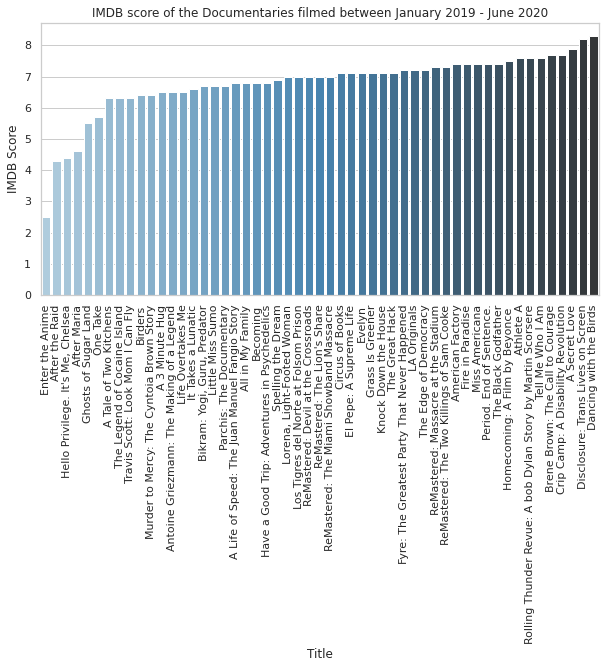

In [ ]:
#visualization of the Documentaries according to IMDB score
fig = plt.figure(figsize = (10, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x=doc["Title"], y=doc["IMDB Score"], palette="Blues_d")
plt.xticks(rotation=90)
plt.title("IMDB score of the Documentaries filmed between January 2019 - June 2020")
plt.show()

**3-Which genre has the highest IMDB score among movies shot in English?**

In [ ]:
#split dataframe base on Language
eng_language = data[data["Language"] == "English"]
eng_language

,Title,Genre,Premiere,Runtime,IMDB Score,Language
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
8,Paradox,Musical/Western/Fantasy,2018-03-23,73,3.9,English
10,Searching for Sheela,Documentary,2021-04-22,58,4.1,English
14,Mercy,Thriller,2016-11-22,90,4.2,English
...,...,...,...,...,...,...
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English


In [ ]:
#visualization of the movie which has the top IMDB score and its genre
high_IMDB_score = eng_language.sort_values(by = "IMDB Score", ascending=False).head(1)
high_IMDB_score

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English


**4-What is the average "runtime" of movies shot in "Hindi"?**

In [ ]:
#split dataframe base on Hindi language and calculation of the avarage rumtime of the movies which shot in Hindi
hindi_language = data[data["Language"] == "Hindi"]
hindi_language.Runtime.mean()

115.78787878787878

**5-How many categories does the "Genre" Column have and what are these categories? Express it visually.**

In [ ]:
# To see how many genre category the original dataframe 
data["Genre"].value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

In [ ]:
# Change all genre values to lower case to see whether there is repeated categories because of capitalization of the words
data["Genre"]=data["Genre"].str.lower()
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,thriller,2020-08-21,81,2.6,Spanish
2,The App,science fiction/drama,2019-12-26,79,2.6,Italian
3,The Open House,horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,mystery,2020-10-30,90,3.4,Hindi


In [ ]:
# Change all genre values separation to "/" to  see whether there is repeated categories because of the different separations
data["Genre"]=data["Genre"].str.replace(r"-", "/")
data["Genre"]=data["Genre"].str.replace(" / ", "/")
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,thriller,2020-08-21,81,2.6,Spanish
2,The App,science fiction/drama,2019-12-26,79,2.6,Italian
3,The Open House,horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,mystery,2020-10-30,90,3.4,Hindi


In [ ]:
#Correct unnecesary chages to original format
data.at[581, "Genre"] = "one man show"
data.at[558, "Genre"] = "making of"
data.at[496, "Genre"] = "making of"
data.at[489, "Genre"] = "coming of age/comedy/drama"
data.at[467, "Genre"] = "one man show"
data.at[178, "Genre"] = "one man show"
data.at[179, "Genre"] = "one man show"

In [ ]:
# to be able to count all unigue genre categories stack the values which are separated by "/" and count unique categories
genre_category =data["Genre"].str.split("/",expand=True).stack().value_counts()
n = len(pd.unique(genre_category.index))
n

82

Source: https://stackoverflow.com/questions/53436301/how-can-i-calculate-the-3-genres-most-frequent-it-in-python-pandas

In [ ]:
genre_category.index=genre_category.index.str.capitalize()

Text(0.5, 1.0, 'Genre Categories ')

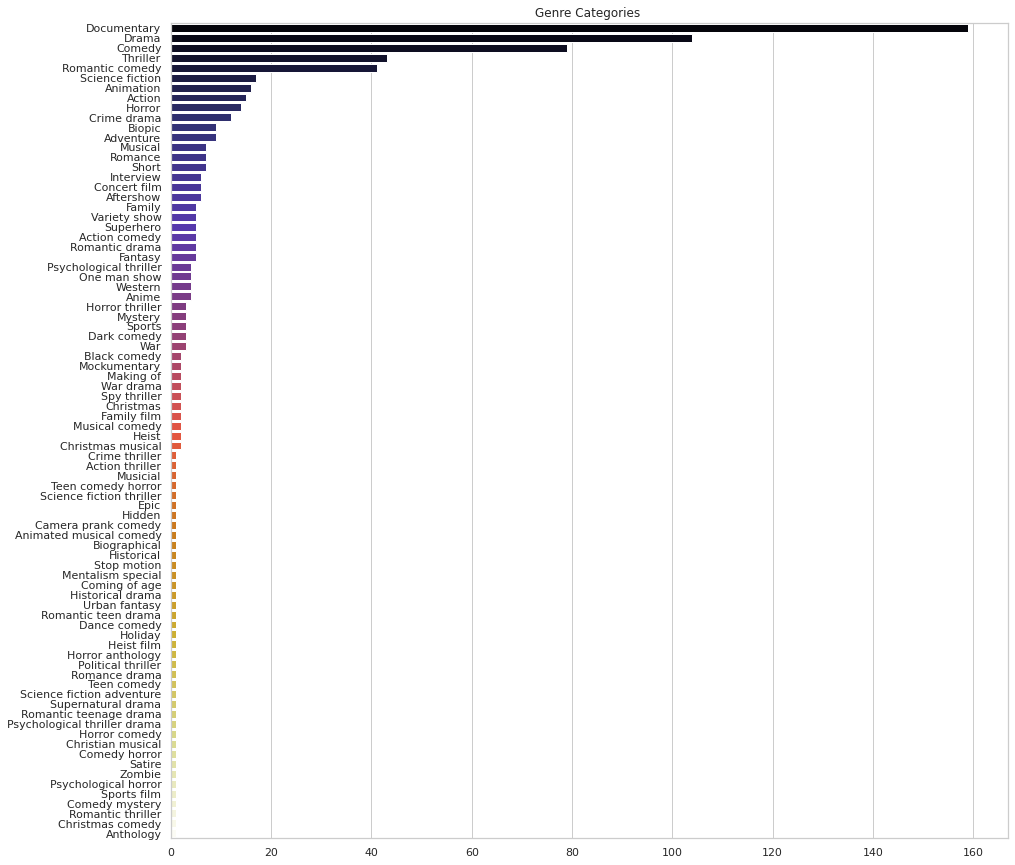

In [ ]:
#Visualization of the unique genre category data
plt.figure(figsize = (15, 15))
sns.set_theme(style="whitegrid")
sns.barplot(x=genre_category, y=genre_category.index, palette="CMRmap")
plt.title("Genre Categories ")


**6-Find the 3 most used languages in the movies in the data set.**

In [ ]:
#count values in language column to find most used languages in the data
most_language = data["Language"].value_counts()
most_language.head(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

**7-What are the top 10 movies with the highest IMDB score?**

In [ ]:
#Sort values of IMDB score column to find top 10 movies
highest_IMDB_score = data.sort_values(by = "IMDB Score", ascending=False).head(10)
highest_IMDB_score

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,documentary,2020-10-04,83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,documentary,2020-12-08,89,8.6,Portuguese
581,Springsteen on Broadway,one man show,2018-12-16,153,8.5,English
580,Winter on Fire: Ukraine's Fight for Freedom,documentary,2015-10-09,91,8.4,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,concert film,2018-12-31,125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,concert film,2020-05-20,85,8.4,English
577,Dancing with the Birds,documentary,2019-10-23,51,8.3,English
576,Cuba and the Cameraman,documentary,2017-11-24,114,8.3,English
573,Klaus,animation/christmas/comedy/adventure,2019-11-15,97,8.2,English
571,13th,documentary,2016-10-07,100,8.2,English


**8-What is the correlation between IMDB score and "Runtime"? Examine and visualize.**

In [ ]:
#whether there is correlation between Runtime and IMDB score
data["Runtime"].corr(data["IMDB Score"])

-0.04089629142078858

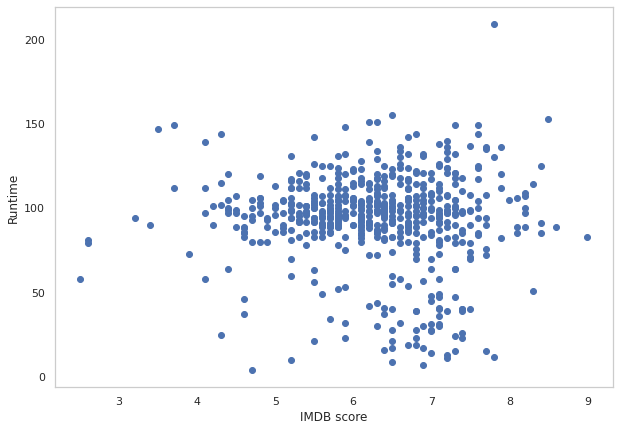

In [ ]:
fig = plt.figure(figsize = (10, 7))
plt.scatter(data["IMDB Score"],data["Runtime"])
plt.xlabel("IMDB score")
plt.ylabel("Runtime")
plt.grid()
plt.show()

**9-What are the top 10 "Genre" with the highest IMDB Score? Visualize it.**

In [ ]:
#group the data by each genres top rated movies and assign it to the new dataframe
genre_IMDB = pd.DataFrame(data.groupby("Genre",)["IMDB Score"].max())
genre_IMDB

,IMDB Score
Genre,
action,6.7
action comedy,6.2
action thriller,6.4
action/adventure,7.3
action/comedy,5.4
...,...
war,7.2
war drama,7.7
war/comedy,6.0


In [ ]:
#Reset the index column of the new df
genre_IMDB = genre_IMDB.reset_index()
genre_IMDB

,Genre,IMDB Score
0,action,6.7
1,action comedy,6.2
2,action thriller,6.4
3,action/adventure,7.3
4,action/comedy,5.4
...,...,...
109,war,7.2
110,war drama,7.7
111,war/comedy,6.0
112,western,7.3


In [ ]:
#get the top rated genres using nlargest function 
genre_IMDB = genre_IMDB.nlargest(10, "IMDB Score")

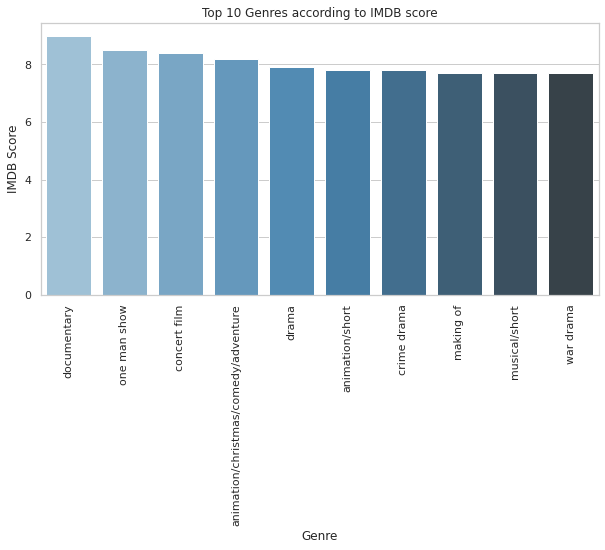

In [ ]:
fig = plt.figure(figsize = (10, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x=genre_IMDB["Genre"], y=genre_IMDB["IMDB Score"], palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Top 10 Genres according to IMDB score")
plt.show()

**10-What are the top 10 movies with the highest "Runtime"? Visualize it.**

In [ ]:
#Sort values of Runtime column to find the top 10 movies with the highest Runtime
high_runtime = data.sort_values(by = "Runtime", ascending=False).head(10)
high_runtime

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,crime drama,2019-11-27,209,7.8,English
328,Da 5 Bloods,war drama,2020-06-12,155,6.5,English
581,Springsteen on Broadway,one man show,2018-12-16,153,8.5,English
247,Citation,drama,2020-11-06,151,6.2,English
284,The Forest of Love,drama,2019-10-11,151,6.3,Japanese
509,Raat Akeli Hai,thriller,2020-07-31,149,7.3,Hindi
7,The Last Days of American Crime,heist film/thriller,2020-06-05,149,3.7,English
543,Ludo,anthology/dark comedy,2020-11-12,149,7.6,Hindi
194,Army of the Dead,zombie/heist,2021-05-21,148,5.9,English
5,Drive,action,2019-11-01,147,3.5,Hindi


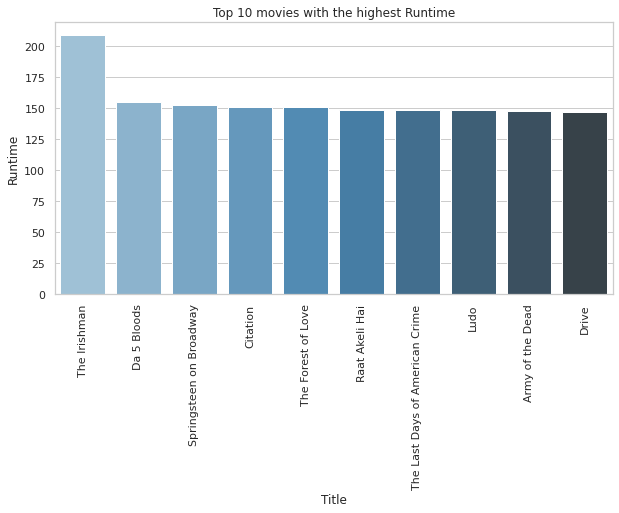

In [ ]:
fig = plt.figure(figsize = (10, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x=high_runtime["Title"], y=high_runtime["Runtime"], palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Top 10 movies with the highest Runtime")
plt.show()

**11-In which year was the most movies released? Visualize it.**

In [ ]:
#Change Dtype of the Date Column and add the values into a new column
data["Date"] = pd.to_datetime(data.Premiere)
data["Date"]


0     2019-08-05
1     2020-08-21
2     2019-12-26
3     2018-01-19
4     2020-10-30
         ...    
579   2018-12-31
580   2015-10-09
581   2018-12-16
582   2020-12-08
583   2020-10-04
Name: Date, Length: 584, dtype: datetime64[ns]

In [ ]:
#Use .dt.year attribute to return the year of the datetime and assign it to a new column 
data["Year"] = data["Date"].dt.year
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date,Year
0,Enter the Anime,documentary,2019-08-05,58,2.5,English/Japanese,2019-08-05,2019
1,Dark Forces,thriller,2020-08-21,81,2.6,Spanish,2020-08-21,2020
2,The App,science fiction/drama,2019-12-26,79,2.6,Italian,2019-12-26,2019
3,The Open House,horror thriller,2018-01-19,94,3.2,English,2018-01-19,2018
4,Kaali Khuhi,mystery,2020-10-30,90,3.4,Hindi,2020-10-30,2020


In [ ]:
#Caount the values to calculate how many movies were shot during the years including to the df
year = data.Year.value_counts()
year

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Year, dtype: int64

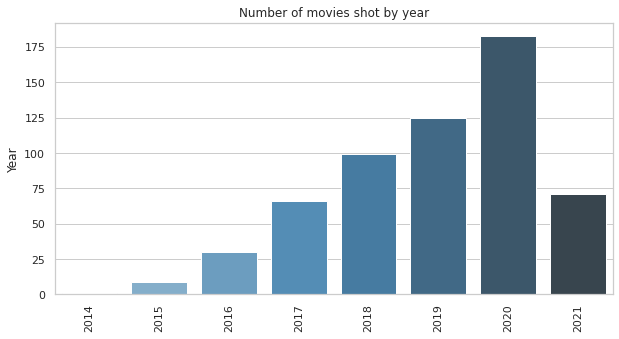

In [ ]:
fig = plt.figure(figsize = (10, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x=year.index, y=year, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Number of movies shot by year")
plt.show()

**12-Which language movies have the lowest average IMBD rating? Visualize it.**

In [ ]:
#group the data by each language and their average IMDB score and assign it to the new dataframe
lang_ave_score = pd.DataFrame(data.groupby("Language")["IMDB Score"].mean())
lang_ave_score.head()

,IMDB Score
Language,
Bengali,7.10000
Dutch,5.80000
English,6.38005
English/Akan,7.70000
English/Arabic,7.30000


In [ ]:
lang_ave_score =lang_ave_score.reset_index()

In [ ]:
#Find the movie languages which has the lowest average IMBD score using .nsmallest attribute
lang_ave_score=lang_ave_score.nsmallest(5, "IMDB Score")
lang_ave_score

,Language,IMDB Score
24,Malay,4.200000
6,English/Japanese,4.400000
14,Filipino,5.100000
26,Norwegian,5.100000
27,Polish,5.166667


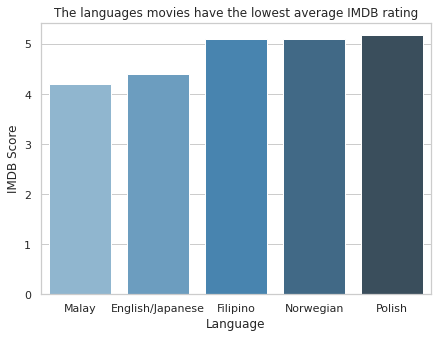

In [ ]:
fig = plt.figure(figsize = (7, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x=lang_ave_score["Language"], y=lang_ave_score["IMDB Score"], palette="Blues_d")
plt.title("The languages movies have the lowest average IMDB rating")
plt.show()

**13-Which year has the greatest total runtime?**

In [ ]:
#group the data by each year and their total runtime and assign it to the new dataframe
year_run_sum = pd.DataFrame(data.groupby("Year")["Runtime"].sum())
year_run_sum

,Runtime
Year,
2014,81
2015,814
2016,2766
2017,6129
2018,9405
2019,10856
2020,17384
2021,7214


In [ ]:
#Find the year which has the highest runtime using .nlargest attribute
year_run_sum.nlargest(1,"Runtime")

,Runtime
Year,
2020,17384


**14-What is the "Genre" in which each language is used the most?**

In [ ]:
#group the data by each genre and unique language using .unique attribute and assign it to the new dataframe
lang_genre = pd.DataFrame(data.groupby("Genre")["Language"].unique())
lang_genre

,Language
Genre,
action,"[Hindi, French, English]"
action comedy,"[Malay, English]"
action thriller,[English]
action/adventure,[English/Korean]
action/comedy,[English]
...,...
war,[English]
war drama,"[English, English/Akan]"
war/comedy,[English]


In [ ]:
lang_genre = lang_genre.reset_index()
lang_genre

,Genre,Language
0,action,"[Hindi, French, English]"
1,action comedy,"[Malay, English]"
2,action thriller,[English]
3,action/adventure,[English/Korean]
4,action/comedy,[English]
...,...,...
109,war,[English]
110,war drama,"[English, English/Akan]"
111,war/comedy,[English]
112,western,"[English, Portuguese]"


In [ ]:
#To be able to count the lenght of each cell value in the Language column changing type to str and  use the str.split attribute to define the count separation. 
#Assign it to new df
lang_genre_count = pd.DataFrame(lang_genre["Language"].astype("str").str.split(' ').str.len())
lang_genre_count

,Language
0,3
1,2
2,1
3,1
4,1
...,...
109,1
110,2
111,1
112,2


In [ ]:
#change name of the language column to "Lang_count"
lang_genre_count = lang_genre_count.rename(columns={"Language":"Lang_count"})


In [ ]:
#to be able to join "Lang_count" column to lang_genre dataframe, assign it to a variable 
lang_count = lang_genre_count["Lang_count"]

In [ ]:
# join the new column to the lang_genre df
lang_genre = lang_genre.join(lang_count)
lang_genre

,Genre,Language,Lang_count
0,action,"[Hindi, French, English]",3
1,action comedy,"[Malay, English]",2
2,action thriller,[English],1
3,action/adventure,[English/Korean],1
4,action/comedy,[English],1
...,...,...,...
109,war,[English],1
110,war drama,"[English, English/Akan]",2
111,war/comedy,[English],1
112,western,"[English, Portuguese]",2


In [ ]:
#Find the genre in which different languages used the most, using  .nlargest attribute
lang_genre.nlargest(1, "Lang_count")

,Genre,Language,Lang_count
45,documentary,"[English/Japanese, English, Spanish, English/S...",20


**15-Is there any outlier data in the data set? Please explain.**

In [ ]:
#check mean vs median values  to see if there is an outlier in the given data 
data["IMDB Score"].describe().T

count    584.000000
mean       6.271747
std        0.979256
min        2.500000
25%        5.700000
50%        6.350000
75%        7.000000
max        9.000000
Name: IMDB Score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


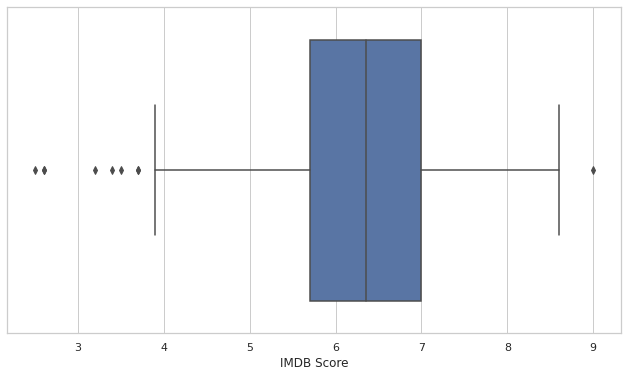

In [ ]:
fig = plt.figure(figsize = (11, 6))
sns.boxplot(data["IMDB Score"])

In [ ]:
#check mean vs median values  to see if there is an outlier in the given data 
data["Runtime"].describe().T

count    584.000000
mean      93.577055
std       27.761683
min        4.000000
25%       86.000000
50%       97.000000
75%      108.000000
max      209.000000
Name: Runtime, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


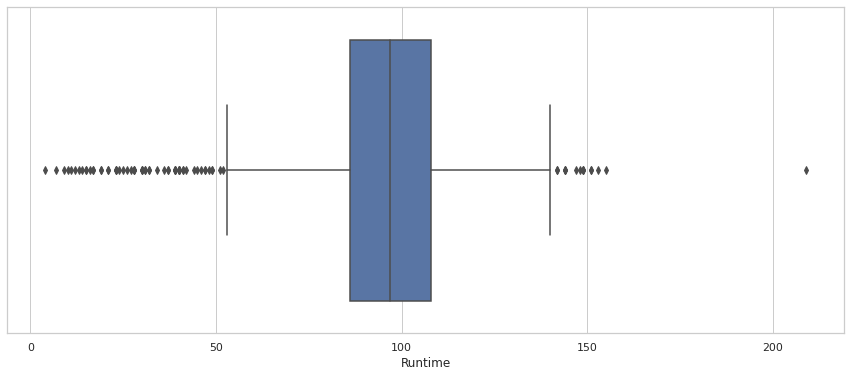

In [ ]:
fig = plt.figure(figsize = (15, 6))
sns.boxplot(data["Runtime"])